# LAB-8

### *Implementing OR, AND and XOR Gates using Neural Networks*

In [50]:
# importing libraries
import numpy as np

In [51]:
# defining input features
X = np.array([[0,0],[0,1],[1,0],[1,1]])

In [52]:
# asking user for the name of the gate
ch = int(input('Which gate do you want to implement?\n1. OR\n2. AND\n3. XOR\n\n'))
if ch == 1:
    Y_target = np.array([[0],[1],[1],[1]])
elif ch == 2:
    Y_target = np.array([[0],[0],[0],[1]])
elif ch == 3:
    Y_target = np.array([[0],[1],[1],[0]])
else:
    print('Recheck your choice!')

Which gate do you want to implement?
1. OR
2. AND
3. XOR

1


In [53]:
# assigning random weights
# 6 for hidden layer (with 3 neurons)
# 3 for output layer (with 1 neuron)
W1 = np.array([[0.2,0.3,0.4],[0.5,0.6,0.6]])
W2 = np.array([[0.4],[0.5],[0.2]])
print(W1)
print('\n',W2)

# learning rate
lr = 0.05

[[0.2 0.3 0.4]
 [0.5 0.6 0.6]]

 [[0.4]
 [0.5]
 [0.2]]


In [54]:
# defining activation function - Sigmoid function
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [55]:
# defining derivative of activation function - derivative of the Sigmoid function
def der_sigmoid(x):
    return sigmoid(x)*(1-sigmoid(x))

### Forward Propagation (first iteration)

In [56]:
Z = np.dot(X,W1)  # pre-activation matrix for the neurons in hidden layer
print('Z:\n',Z)
H = sigmoid(Z)    # post-activation matrix 
print('\nH:\n',H)
U = np.dot(H,W2)  # pre-activation matrix for the neuron in output layer
print('\nU:\n',U)
Y = sigmoid(U)    # post-activation matrix
print('\nY:\n',Y)
E = Y-Y_target    # the error due to selection of random weights
print('\nE:\n',E)

Z:
 [[0.  0.  0. ]
 [0.5 0.6 0.6]
 [0.2 0.3 0.4]
 [0.7 0.9 1. ]]

H:
 [[0.5        0.5        0.5       ]
 [0.62245933 0.64565631 0.64565631]
 [0.549834   0.57444252 0.59868766]
 [0.66818777 0.7109495  0.73105858]]

U:
 [[0.55      ]
 [0.70094315]
 [0.62689239]
 [0.76896158]]

Y:
 [[0.63413559]
 [0.66839685]
 [0.65178449]
 [0.68329622]]

E:
 [[ 0.63413559]
 [-0.33160315]
 [-0.34821551]
 [-0.31670378]]


### Backpropagation

In [57]:
for epoch in range(1000):
    # first, forward propagation will happen
    Z = np.dot(X,W1)  
    H = sigmoid(Z)    
    U = np.dot(H,W2) 
    Y = sigmoid(U)    
    E = Y-Y_target    
    
    # calculation of loss function (Mean Square Error loss)
    L = 1/2*(np.power(E,2))
    #print(output_error.sum())
    #print(output_error)

    # Backpropagation - Stage 1
    dL_dY = Y-Y_target
    dY_dU = Y*(1-Y)
    dU_dW2 = H
    #print(dL_dY)
    #print(dY_dU)
    #print(dU_dW2)

    dL_dW2=np.dot(dU_dW2.T,dL_dY*dY_dU)

    # weight updates in stage 1
    W2 -= lr*dL_dW2
    #print(weight_output)

    # Backpropagation - Stage 2
    dL_dY = Y-Y_target
    dY_dU = Y*(1-Y)
    dU_dH = W2
    dH_dZ = H*(1-H)
    dZ_dW1 = X 

    dL_dH = np.dot(dL_dY*dY_dU,dU_dH.T)
    dL_dW1 = np.dot(dZ_dW1.T,dH_dZ*dL_dH)

    # weight updates in stage 2
    W1 -= lr*dL_dW1
    #print(weight_hidden)
    
print('### Updated Weights ###\n')
print(W1)
print('\n',W2)

### Updated Weights ###

[[0.65655034 0.86353995 0.74275364]
 [0.90170586 1.08845947 0.9037142 ]]

 [[0.5312362 ]
 [0.83478758]
 [0.46520461]]


### Testing

In [58]:
# testing on an input data point
point = np.array([0,0])
z = np.dot(point,W1)
h = sigmoid(z)
op = np.dot(h,W2)
y_cap = sigmoid(op)
print(y_cap)

[0.71414763]


### Results

#### For OR Gate:

W1: 

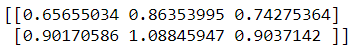

W2:

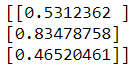
 
#### For AND Gate:

W1:

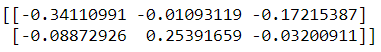
 
W2:

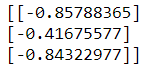
 
#### For XOR Gate:

W1:

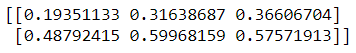

W2:

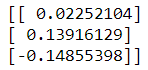